In [1]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import math
import pandas as pd
from numpy import genfromtxt

In [2]:
def cleanData(t,dup,col1):
    
    #get rid of duplicates
    cols = np.array([])
    for i in range(len(dup)):
        if (dup[i] == True):
            cols = np.append(cols,i)     
    #t.mask(dup == True)
    
    imask = 0
    for i in range(len(col1)):
        first_match = col1[i]
        for j in range(i+1,len(col1)):
            if (first_match == col1[j]):
                cols = np.append(cols,j)
            else: break
    cols = np.unique(cols)
    cols = cols.astype(int)
    t.drop(t.index[cols])
    
    print('removed',len(cols),'rows')
        
    return t

In [3]:
def AbsoluteMagnitudes(plx,Bmag,Vmag,Gmag,Jmag,Hmag,Kmag,umag,gmag,rmag,imag,zmag):
    #Calculate distance, and absolute magnitudes
    
    Dist = np.array([])
    Bmags = np.array([])
    Vmags = np.array([])
    Gmags = np.array([])
    Jmags = np.array([])
    Hmags = np.array([])
    Kmags = np.array([])
    umags = np.array([])
    gmags = np.array([])
    rmags = np.array([])
    imags = np.array([])
    zmags = np.array([])

    Dist = 1000./plx
    Bmags = Bmag - 5 * np.log10(Dist) + 5
    Vmags = Vmag - 5 * np.log10(Dist) + 5
    Gmags = Gmag - 5 * np.log10(Dist) + 5
    Jmags = Jmag - 5 * np.log10(Dist) + 5
    Hmags = Hmag - 5 * np.log10(Dist) + 5
    Kmags = Kmag - 5 * np.log10(Dist) + 5
    umags = umag - 5 * np.log10(Dist) + 5
    gmags = gmag - 5 * np.log10(Dist) + 5
    rmags = rmag - 5 * np.log10(Dist) + 5
    imags = imag - 5 * np.log10(Dist) + 5
    zmags = zmag - 5 * np.log10(Dist) + 5
    
    return Dist, Bmags, Vmags, Gmags,Jmags,Hmags,Kmags, umags, gmags, rmags, imags, zmags

In [4]:
def AbsoluteMagnitudes3(plx,GBmag,GRmag,Gmag,Jmag,Hmag,Kmag,umag,gmag,rmag,imag,zmag):
    #Calculate distance, and absolute magnitudes
    
    Dist = np.array([])
    GBmags = np.array([])
    GRmags = np.array([])
    Gmags = np.array([])
    Jmags = np.array([])
    Hmags = np.array([])
    Kmags = np.array([])
    umags = np.array([])
    gmags = np.array([])
    rmags = np.array([])
    imags = np.array([])
    zmags = np.array([])

    Dist = 1000./plx
    GBmags = GBmag - 5 * np.log10(Dist) + 5
    GRmags = GRmag - 5 * np.log10(Dist) + 5
    Gmags = Gmag - 5 * np.log10(Dist) + 5
    Jmags = Jmag - 5 * np.log10(Dist) + 5
    Hmags = Hmag - 5 * np.log10(Dist) + 5
    Kmags = Kmag - 5 * np.log10(Dist) + 5
    umags = umag - 5 * np.log10(Dist) + 5
    gmags = gmag - 5 * np.log10(Dist) + 5
    rmags = rmag - 5 * np.log10(Dist) + 5
    imags = imag - 5 * np.log10(Dist) + 5
    zmags = zmag - 5 * np.log10(Dist) + 5
    
    return Dist, GBmags, GRmags, Gmags,Jmags,Hmags,Kmags, umags, gmags, rmags, imags, zmags

In [5]:
def ColorClassification(Gmags,Kmags,colors):    
    #split the stars into different categories based on G-K
    
    G_K = Gmags-Kmags
    color = np.ones(len(G_K))*1000
    for i in range(len(colors)):
        for j in range(len(G_K)):
            if (i == 0):
                if (G_K[j] <= colors[i]):
                    color[j] = colors[i]
            elif(G_K[j] <= colors[i] and G_K[j] > colors[i-1]):
                color[j] = colors[i]
    return color

#and main_type[i] == 'Star'

In [6]:
def CreateTemplates(color,colors,Bmags, Vmags,Gmags,Jmags,Hmags,Kmags,umags,gmags,rmags,imags,zmags):
    #for each color class, a template is created of the absolute magnitudes of the stars and their color indices
    
    G_K = Gmags-Kmags
    avg_colors = np.array([])
    err_colors = np.array([])
    stars = np.array([])
    for c in colors:
        #create array of values for color indices and absolute magnitudes
        G_B_array = np.array([])
        G_V_array = np.array([])
        G_J_array = np.array([])
        G_H_array = np.array([])
        G_K_array = np.array([])
        G_u_array = np.array([])
        G_g_array = np.array([])
        G_r_array = np.array([])
        G_i_array = np.array([])
        G_z_array = np.array([])
        B = np.array([])
        V = np.array([])
        G = np.array([])
        J = np.array([])
        H = np.array([])
        K = np.array([])
        u = np.array([])
        g = np.array([])
        r = np.array([])
        i_m = np.array([])
        z = np.array([])
        star_count = 0
        #fill arrays with values if the values are part of the color category
        for i in range(len(Bmags)):
            if (color[i] == c):
                G_B_array = np.append(G_B_array,Gmags[i]-Bmags[i])
                G_V_array = np.append(G_V_array,Gmags[i]-Vmags[i])
                G_J_array = np.append(G_J_array,Gmags[i]-Jmags[i])
                G_H_array = np.append(G_H_array,Gmags[i]-Hmags[i])
                G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
                G_u_array = np.append(G_u_array,Gmags[i]-umags[i])
                G_g_array = np.append(G_g_array,Gmags[i]-gmags[i])
                G_r_array = np.append(G_r_array,Gmags[i]-rmags[i])
                G_i_array = np.append(G_i_array,Gmags[i]-umags[i])
                G_z_array = np.append(G_z_array,Gmags[i]-zmags[i])
                B = np.append(B,Bmags[i])
                V = np.append(V,Vmags[i])
                G = np.append(G,Gmags[i])
                J = np.append(J,Jmags[i])
                H = np.append(H,Hmags[i])
                K = np.append(K,Kmags[i])
                u = np.append(u,umags[i])
                g = np.append(g,umags[i])
                r = np.append(r,rmags[i])
                i_m = np.append(i_m,imags[i])
                z = np.append(z,zmags[i])
                star_count = star_count +1
        #average G-K value (i dont think this is necessary)
        avg_colors = np.append(avg_colors,np.mean(G_K_array))
        err_colors = np.append(err_colors,np.std(G_K_array))
        #number of stars per color
        stars = np.append(stars,star_count)
        #relative SED
        mag_array = [np.nanmean(G_u_array),np.nanmean(G_B_array), np.nanmean(G_g_array),\
                     np.nanmean(G_V_array),np.nanmean(G_i_array), np.nanmean(G_r_array), \
                     np.nanmean(G_z_array),np.nanmean(G_J_array), np.nanmean(G_H_array), 
                     np.nanmean(G_K_array)]
        std_array = [np.nanstd(G_u_array),np.nanstd(G_B_array), np.nanstd(G_g_array),\
                     np.nanstd(G_V_array),np.nanstd(G_i_array), np.nanstd(G_r_array), \
                     np.nanstd(G_z_array),np.nanstd(G_J_array), np.nanstd(G_H_array), 
                     np.nanstd(G_K_array)]
        #absolute SED
        mag_array2 = [np.nanmean(u), np.nanmean(B), np.nanmean(g), \
                      np.nanmean(V), np.nanmean(i_m), np.nanmean(G), \
                      np.nanmean(r), np.nanmean(z), np.nanmean(J), \
                      np.nanmean(H), np.nanmean(K)]
        std_array2 = [np.nanstd(u), np.nanstd(B), np.nanstd(g), \
                      np.nanstd(V), np.nanstd(i_m), np.nanstd(G), \
                      np.nanstd(r), np.nanstd(z), np.nanstd(J), \
                      np.nanstd(H), np.nanstd(K)]
        #add standard deviation error
        
        val = np.sqrt(len(G_B_array))
        std_array3 = std_array/val
        val2 = np.sqrt(len(B))
        std_array4 = std_array2/val2
        
        #stack SEDs
        if (c == colors[0]):
            color_mags = np.array(mag_array)
            color_std = np.array(std_array)
            color_std_err = np.array(std_array3)
            abs_color_mags = np.array(mag_array2)
            abs_color_std = np.array(std_array2)
            abs_color_std_err = np.array(std_array4)
        else:
            color_mags = np.vstack((color_mags,mag_array))
            color_std = np.vstack((color_std,std_array))
            color_std_err = np.vstack((color_std_err,std_array3))
            abs_color_mags = np.vstack((abs_color_mags, mag_array2))
            abs_color_std = np.vstack((abs_color_mags, std_array2))
            abs_color_std_err = np.vstack((abs_color_std_err,std_array4))
    return stars,color_mags,color_std,color_std_err,abs_color_mags,abs_color_std,abs_color_std_err

In [7]:
def CreateTemplates2(color,colors,Bmags, Vmags,Gmags,Jmags,Hmags,Kmags,umags,gmags,rmags,imags,zmags):
    #for each color class, a template is created of the absolute magnitudes of the stars and their color indices
    
    G_K = Gmags-Kmags
    avg_colors = np.array([])
    err_colors = np.array([])
    stars = np.array([])
    for c in colors:
        #create array of values for color indices and absolute magnitudes
        G_B_array = np.array([])
        G_V_array = np.array([])
        G_J_array = np.array([])
        G_H_array = np.array([])
        G_K_array = np.array([])
        G_u_array = np.array([])
        G_g_array = np.array([])
        G_r_array = np.array([])
        G_i_array = np.array([])
        G_z_array = np.array([])
        B = np.array([])
        V = np.array([])
        G = np.array([])
        J = np.array([])
        H = np.array([])
        K = np.array([])
        u = np.array([])
        g = np.array([])
        r = np.array([])
        i_m = np.array([])
        z = np.array([])
        star_count = 0
        #fill arrays with values if the values are part of the color category
        for i in range(len(Bmags)):
            if (color[i] == c):
                G_B_array = np.append(G_B_array,Gmags[i]-Bmags[i])
                G_V_array = np.append(G_V_array,Gmags[i]-Vmags[i])
                G_J_array = np.append(G_J_array,Gmags[i]-Jmags[i])
                G_H_array = np.append(G_H_array,Gmags[i]-Hmags[i])
                G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
                G_u_array = np.append(G_u_array,Gmags[i]-umags[i])
                G_g_array = np.append(G_g_array,Gmags[i]-gmags[i])
                G_r_array = np.append(G_r_array,Gmags[i]-rmags[i])
                G_i_array = np.append(G_i_array,Gmags[i]-umags[i])
                G_z_array = np.append(G_z_array,Gmags[i]-zmags[i])
                B = np.append(B,Bmags[i])
                V = np.append(V,Vmags[i])
                G = np.append(G,Gmags[i])
                J = np.append(J,Jmags[i])
                H = np.append(H,Hmags[i])
                K = np.append(K,Kmags[i])
                u = np.append(u,umags[i])
                g = np.append(g,umags[i])
                r = np.append(r,rmags[i])
                i_m = np.append(i_m,imags[i])
                z = np.append(z,zmags[i])
                star_count = star_count +1
        #average G-K value (i dont think this is necessary)
        avg_colors = np.append(avg_colors,np.mean(G_K_array))
        err_colors = np.append(err_colors,np.std(G_K_array))
        #number of stars per color
        stars = np.append(stars,star_count)
        #relative SED
        mag_array = [np.mean(G_u_array),np.mean(G_B_array), np.mean(G_g_array),\
                     np.mean(G_V_array),np.mean(G_i_array), np.mean(G_r_array), \
                     np.mean(G_z_array),np.mean(G_J_array), np.mean(G_H_array), 
                     np.mean(G_K_array)]
        std_array = [np.std(G_u_array),np.std(G_B_array), np.std(G_g_array),\
                     np.std(G_V_array),np.std(G_i_array), np.std(G_r_array), \
                     np.std(G_z_array),np.std(G_J_array), np.std(G_H_array), 
                     np.std(G_K_array)]
        #absolute SED
        mag_array2 = [np.mean(u), np.mean(B), np.mean(g), \
                      np.mean(V), np.mean(i_m), np.mean(G), \
                      np.mean(r), np.mean(z), np.mean(J), \
                      np.mean(H), np.mean(K)]
        std_array2 = [np.std(u), np.std(B), np.std(g), \
                      np.std(V), np.std(i_m), np.std(G), \
                      np.std(r), np.std(z), np.std(J), \
                      np.std(H), np.std(K)]
        #add standard deviation error
        
        val = np.sqrt(len(G_B_array))
        std_array3 = std_array/val
        val2 = np.sqrt(len(B))
        std_array4 = std_array2/val2
        
        #stack SEDs
        if (c == colors[0]):
            color_mags = np.array(mag_array)
            color_std = np.array(std_array)
            color_std_err = np.array(std_array3)
            abs_color_mags = np.array(mag_array2)
            abs_color_std = np.array(std_array2)
            abs_color_std_err = np.array(std_array4)
        else:
            color_mags = np.vstack((color_mags,mag_array))
            color_std = np.vstack((color_std,std_array))
            color_std_err = np.vstack((color_std_err,std_array3))
            abs_color_mags = np.vstack((abs_color_mags, mag_array2))
            abs_color_std = np.vstack((abs_color_mags, std_array2))
            abs_color_std_err = np.vstack((abs_color_std_err,std_array4))
    return stars,color_mags,color_std,color_std_err,abs_color_mags,abs_color_std,abs_color_std_err

In [8]:
def CreateTemplates3(color,colors,GBmags, GRmags,Gmags,Jmags,Hmags,Kmags,umags,gmags,rmags,imags,zmags):
    #for each color class, a template is created of the absolute magnitudes of the stars and their color indices
    
    G_K = Gmags-Kmags
    avg_colors = np.array([])
    err_colors = np.array([])
    stars = np.array([])
    for c in colors:
        #create array of values for color indices and absolute magnitudes
        G_GB_array = np.array([])
        G_GR_array = np.array([])
        G_J_array = np.array([])
        G_H_array = np.array([])
        G_K_array = np.array([])
        G_u_array = np.array([])
        G_g_array = np.array([])
        G_r_array = np.array([])
        G_i_array = np.array([])
        G_z_array = np.array([])
        GB = np.array([])
        GR = np.array([])
        G = np.array([])
        J = np.array([])
        H = np.array([])
        K = np.array([])
        u = np.array([])
        g = np.array([])
        r = np.array([])
        i_m = np.array([])
        z = np.array([])
        star_count = 0
        #fill arrays with values if the values are part of the color category
        for i in range(len(Gmags)):
            if (color[i] == c):
                G_GB_array = np.append(G_GB_array,Gmags[i]-GBmags[i])
                G_GR_array = np.append(G_GR_array,Gmags[i]-GRmags[i])
                G_J_array = np.append(G_J_array,Gmags[i]-Jmags[i])
                G_H_array = np.append(G_H_array,Gmags[i]-Hmags[i])
                G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
                G_u_array = np.append(G_u_array,Gmags[i]-umags[i])
                G_g_array = np.append(G_g_array,Gmags[i]-gmags[i])
                G_r_array = np.append(G_r_array,Gmags[i]-rmags[i])
                G_i_array = np.append(G_i_array,Gmags[i]-umags[i])
                G_z_array = np.append(G_z_array,Gmags[i]-zmags[i])
                GB = np.append(GB,GBmags[i])
                GR = np.append(GR,GRmags[i])
                G = np.append(G,Gmags[i])
                J = np.append(J,Jmags[i])
                H = np.append(H,Hmags[i])
                K = np.append(K,Kmags[i])
                u = np.append(u,umags[i])
                g = np.append(g,umags[i])
                r = np.append(r,rmags[i])
                i_m = np.append(i_m,imags[i])
                z = np.append(z,zmags[i])
                star_count = star_count +1
        #average G-K value (i dont think this is necessary)
        avg_colors = np.append(avg_colors,np.mean(G_K_array))
        err_colors = np.append(err_colors,np.std(G_K_array))
        #number of stars per color
        stars = np.append(stars,star_count)
        #relative SED
        mag_array = [np.nanmean(G_u_array),np.nanmean(G_g_array), np.nanmean(G_GB_array),\
                     np.nanmean(G_r_array),np.nanmean(G_i_array), np.nanmean(G_GR_array), \
                     np.nanmean(G_z_array),np.nanmean(G_J_array), np.nanmean(G_H_array), 
                     np.nanmean(G_K_array)]
        std_array = [np.nanstd(G_u_array),np.nanstd(G_g_array), np.nanstd(G_GB_array),\
                     np.nanstd(G_r_array),np.nanstd(G_i_array), np.nanstd(G_GR_array), \
                     np.nanstd(G_z_array),np.nanstd(G_J_array), np.nanstd(G_H_array), 
                     np.nanstd(G_K_array)]
        #absolute SED
        mag_array2 = [np.nanmean(u), np.nanmean(g), np.nanmean(GB), \
                      np.nanmean(r), np.nanmean(G), np.nanmean(i), \
                      np.nanmean(GR), np.nanmean(z), np.nanmean(J), \
                      np.nanmean(H), np.nanmean(K)]
        std_array2 = [np.nanstd(u), np.nanstd(g), np.nanstd(GB), \
                      np.nanstd(r), np.nanstd(G), np.nanstd(i_m), \
                      np.nanstd(GR), np.nanstd(z), np.nanstd(J), \
                      np.nanstd(H), np.nanstd(K)]
        #add standard deviation error
        
        val = np.sqrt(len(G_u_array))
        std_array3 = std_array/val
        val2 = np.sqrt(len(u))
        std_array4 = std_array2/val2
        
        #stack SEDs
        if (c == colors[0]):
            color_mags = np.array(mag_array)
            color_std = np.array(std_array)
            color_std_err = np.array(std_array3)
            abs_color_mags = np.array(mag_array2)
            abs_color_std = np.array(std_array2)
            abs_color_std_err = np.array(std_array4)
        else:
            color_mags = np.vstack((color_mags,mag_array))
            color_std = np.vstack((color_std,std_array))
            color_std_err = np.vstack((color_std_err,std_array3))
            abs_color_mags = np.vstack((abs_color_mags, mag_array2))
            abs_color_std = np.vstack((abs_color_mags, std_array2))
            abs_color_std_err = np.vstack((abs_color_std_err,std_array4))
    return stars,color_mags,color_std,color_std_err,abs_color_mags,abs_color_std,abs_color_std_err

In [54]:
def CreateTemplates4(color,colors,GBmags, GRmags,Gmags,Jmags,Hmags,Kmags,umags,gmags,rmags,imags,zmags,umag_err,\
                    gmag_err,rmag_err,imag_err,zmag_err,Gmags_err2,GBmags_err2,GRmags_err2):
    #for each color class, a template is created of the absolute magnitudes of the stars and their color indices
    
    G_K = Gmags-Kmags
    avg_colors = np.array([])
    err_colors = np.array([])
    stars = np.array([])
    for c in colors:
        #create array of values for color indices and absolute magnitudes
        G_GB_array = np.array([])
        G_GR_array = np.array([])
        G_J_array = np.array([])
        G_H_array = np.array([])
        G_K_array = np.array([])
        G_u_array = np.array([])
        G_g_array = np.array([])
        G_r_array = np.array([])
        G_i_array = np.array([])
        G_z_array = np.array([])
        G_u_array_err = np.array([])
        G_g_array_err = np.array([])
        G_r_array_err = np.array([])
        G_i_array_err = np.array([])
        G_z_array_err = np.array([])
        G_GB_array_err = np.array([])
        G_GR_array_err = np.array([])
        star_count = 0
        #fill arrays with values if the values are part of the color category
        for i in range(len(Gmags)):
            if (color[i] == c):
                G_GB_array = np.append(G_GB_array,Gmags[i]-GBmags[i])
                G_GR_array = np.append(G_GR_array,Gmags[i]-GRmags[i])
                G_J_array = np.append(G_J_array,Gmags[i]-Jmags[i])
                G_H_array = np.append(G_H_array,Gmags[i]-Hmags[i])
                G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
                G_u_array = np.append(G_u_array,Gmags[i]-umags[i])
                G_g_array = np.append(G_g_array,Gmags[i]-gmags[i])
                G_r_array = np.append(G_r_array,Gmags[i]-rmags[i])
                G_i_array = np.append(G_i_array,Gmags[i]-umags[i])
                G_z_array = np.append(G_z_array,Gmags[i]-zmags[i])
                G_u_array_err = np.append(G_u_array_err,Gmags_err2[i]-umag_err[i])
                G_g_array_err = np.append(G_g_array_err,Gmags_err2[i]-gmag_err[i])
                G_r_array_err = np.append(G_r_array_err,Gmags_err2[i]-rmag_err[i])
                G_i_array_err = np.append(G_i_array_err,Gmags_err2[i]-imag_err[i])
                G_z_array_err = np.append(G_z_array_err,Gmags_err2[i]-zmag_err[i])
                G_GB_array_err = np.append(G_GB_array_err,Gmags_err2[i]-GBmags_err2[i])
                G_GR_array_err = np.append(G_GR_array_err,Gmags_err2[i]-GRmags_err2[i])
                star_count = star_count  +1
        #number of stars per color
        stars = np.append(stars,star_count)
        #relative SED
        mag_array = [np.nanmean(G_u_array),np.nanmean(G_g_array), np.nanmean(G_GB_array),\
                     np.nanmean(G_r_array),np.nanmean(G_i_array), np.nanmean(G_GR_array), \
                     np.nanmean(G_z_array),np.nanmean(G_J_array), np.nanmean(G_H_array), 
                     np.nanmean(G_K_array)]
        mag_err_array = [np.nanmean(G_u_array_err),np.nanmean(G_g_array_err), np.nanmean(G_GB_array_err),\
                     np.nanmean(G_r_array_err),np.nanmean(G_i_array_err), np.nanmean(G_GR_array_err), \
                     np.nanmean(G_z_array_err),0,0,0]
        std_array = [np.nanstd(G_u_array),np.nanstd(G_g_array), np.nanstd(G_GB_array),\
                     np.nanstd(G_r_array),np.nanstd(G_i_array), np.nanstd(G_GR_array), \
                     np.nanstd(G_z_array),np.nanstd(G_J_array), np.nanstd(G_H_array), 
                     np.nanstd(G_K_array)]
        #add standard deviation error
        val = np.sqrt(len(G_u_array))
        std_array3 = std_array/val
        #stack SEDs
        if (c == colors[0]):
            color_mags = np.array(mag_array)
            color_std = np.array(std_array)
            color_std_err = np.array(std_array3)
            sdss_err = np.array(mag_err_array)
        else:
            color_mags = np.vstack((color_mags,mag_array))
            color_std = np.vstack((color_std,std_array))
            color_std_err = np.vstack((color_std_err,std_array3))
            sdss_err = np.vstack((sdss_err,mag_err_array))
    return stars,color_mags,color_std,color_std_err,sdss_err

In [9]:
def PrintToFile(colors,stars,color_mags,color_std,color_std_err,name):
    
    rows = len(colors)
    colors2 = np.zeros([rows,1])
    stars2 = np.zeros([rows,1])
    for i in range(rows):
        colors2[i,0] = colors[i]
        stars2[i,0] = stars[i]
    
    arrays=[stars2,color_mags,color_std,color_std_err]

    # Create an array to return to
    FinalTemplate = colors2

    for array in arrays:
        FinalTemplate = np.concatenate([FinalTemplate, array],axis = 1)
        
    columns = 'color,number_of_stars,G_u,G_g,G_GB,G_r,G_i,G_GR,G_z,G_J,G_H,G_K,G_u_std,G_g_std,G_GB_std,G_r_std,\
            G_i_std,G_GR_std,G_z_std,G_J_std,G_H_std,G_K_std,G_u_std_err,G_g_std_err,G_GB_std_err,\
            G_r_std_err,G_i_std_err,G_GR_std_err,G_z_std_err,G_J_std_err,G_H_std_err,G_K_std_err'
        
    np.savetxt(name, FinalTemplate, delimiter=",",header = columns)
    
    return FinalTemplate

# Read in Data

In [38]:
t = pd.read_csv('../Gaia_plx7_dr2.csv')

print("\nThe number of stars is " + str(len(t)))

GBmag = t["phot_bp_mean_mag"].values
GBflux =t["phot_bp_mean_flux"].values
GBmag_err = t["phot_bp_mean_flux_error"].values
GRmag = t["phot_rp_mean_mag"].values
GRflux =t["phot_rp_mean_flux"].values
GRmag_err = t["phot_rp_mean_flux_error"].values
Gmag = t["phot_g_mean_mag"].values
Gflux =t["phot_g_mean_flux"].values
Gmag_err = t["phot_g_mean_flux_error"].values
Jmag = t["j_m"].values
Hmag = t["h_m"].values
Kmag = t["ks_m"].values
umag = t["u_mag"].values
gmag = t["g_mag"].values
rmag = t["r_mag"].values
imag = t["i_mag"].values
zmag = t["z_mag"].values
umag_err = t["u_mag_error"].values
gmag_err = t["g_mag_error"].values
rmag_err = t["r_mag_error"].values
imag_err = t["i_mag_error"].values
zmag_err = t["z_mag_error"].values
plx = t['parallax'].values
plx_err = t["parallax_error"].values
Temp = t['teff_val'].values

print(t.columns.values.tolist())

Dist,GBmags,GRmags,Gmags,Jmags,Hmags,Kmags,umags,gmags,rmags,imags,zmags = \
AbsoluteMagnitudes3(plx,GBmag,GRmag,Gmag,Jmag,Hmag,Kmag,umag,gmag,rmag,imag,zmag)

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (96,122,130) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



The number of stars is 2092886
['Unnamed: 0', 'solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al', 'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved', 'astrometric_primary_flag', 'astrometric_weight_al', 'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error', 'mean_varpi_factor_al', 'astrometric_matched_observations', 'visibility_periods_used', 'astrometric_sigma5d_max', 'frame_rotator_object_type', 'matched_observations', 'duplicated_source', 'phot_g_n_ob

In [11]:
print(t.columns.values.tolist())

['Unnamed: 0', 'solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al', 'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved', 'astrometric_primary_flag', 'astrometric_weight_al', 'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error', 'mean_varpi_factor_al', 'astrometric_matched_observations', 'visibility_periods_used', 'astrometric_sigma5d_max', 'frame_rotator_object_type', 'matched_observations', 'duplicated_source', 'phot_g_n_obs', 'phot_g_mean_flux', 'phot_g_

In [39]:
#propagation of error

Gmags_err = np.sqrt(np.power((-2.5*Gmag_err)/Gflux,2)+np.power((5*plx_err)/plx,2))
GBmags_err = np.sqrt(np.power((-2.5*GBmag_err)/GBflux,2)+np.power((5*plx_err)/plx,2))
GRmags_err = np.sqrt(np.power((-2.5*GRmag_err)/GRflux,2)+np.power((5*plx_err)/plx,2))

umags_err = np.sqrt(np.power(umag_err,2)+np.power((5*plx_err)/plx,2))
gmags_err = np.sqrt(np.power(gmag_err,2)+np.power((5*plx_err)/plx,2))
rmags_err = np.sqrt(np.power(rmag_err,2)+np.power((5*plx_err)/plx,2))
imags_err = np.sqrt(np.power(imag_err,2)+np.power((5*plx_err)/plx,2))
zmags_err = np.sqrt(np.power(zmag_err,2)+np.power((5*plx_err)/plx,2))

In [41]:
Gmags_err2 = np.sqrt(np.power((-2.5*Gmag_err)/Gflux,2))
GBmags_err2 = np.sqrt(np.power((-2.5*GBmag_err)/GBflux,2))
GRmags_err2 = np.sqrt(np.power((-2.5*GRmag_err)/GRflux,2))

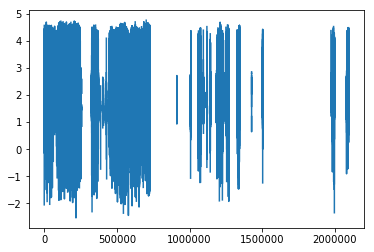

In [78]:
ratio = umags/umag_err
plt.plot(np.log10(ratio))
         

# Plots of Data

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


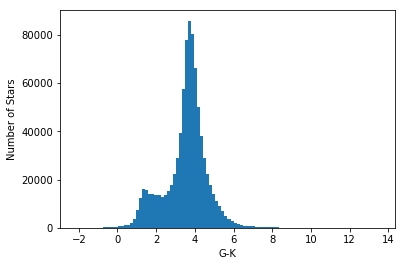

In [11]:
#calculate G-K
G_K = Gmags - Kmags
plt.hist(G_K,range = [min(G_K),max(G_K)],bins = 100)
plt.xlabel('G-K')
plt.ylabel('Number of Stars')
plt.show()

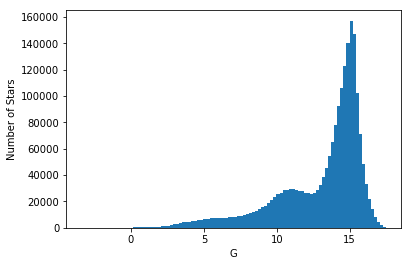

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


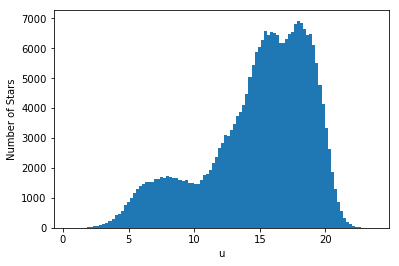

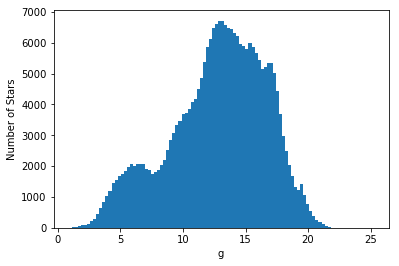

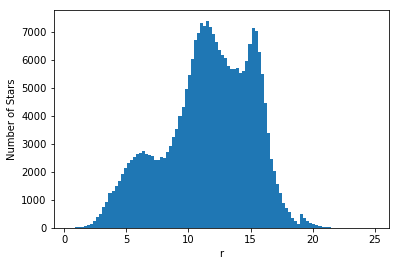

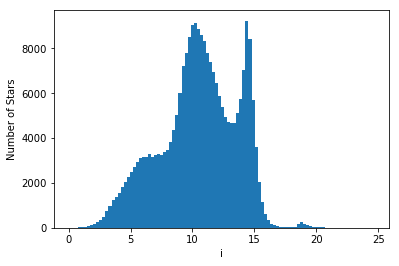

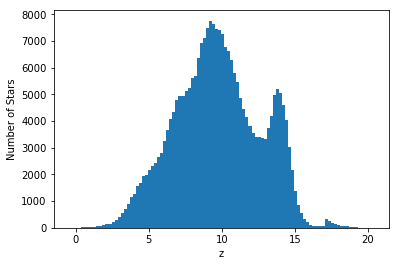

In [12]:
#histograms of each band

plt.hist(Gmags,range = [min(Gmags),max(Gmags)],bins = 100)
plt.xlabel('G')
plt.ylabel('Number of Stars')
plt.show()

plt.hist(umags,range = [min(umags),max(umags)],bins = 100)
plt.xlabel('u')
plt.ylabel('Number of Stars')
plt.show()

plt.hist(gmags,range = [min(gmags),max(gmags)],bins = 100)
plt.xlabel('g')
plt.ylabel('Number of Stars')
plt.show()

plt.hist(rmags,range = [min(rmags),max(rmags)],bins = 100)
plt.xlabel('r')
plt.ylabel('Number of Stars')
plt.show()

plt.hist(imags,range = [min(imags),max(imags)],bins = 100)
plt.xlabel('i')
plt.ylabel('Number of Stars')
plt.show()

plt.hist(zmags,range = [min(zmags),max(zmags)],bins = 100)
plt.xlabel('z')
plt.ylabel('Number of Stars')
plt.show()

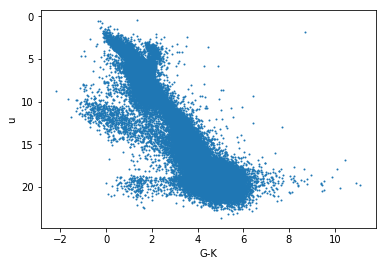

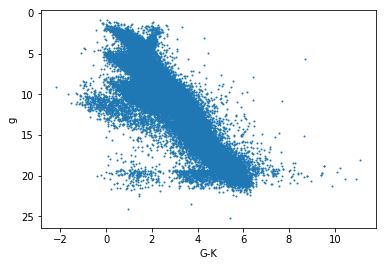

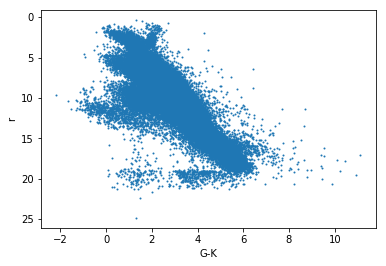

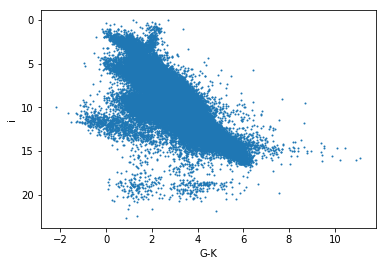

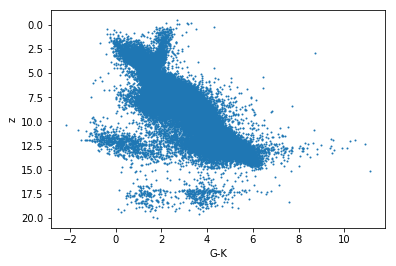

In [13]:
#Scatter Plots of Relation between data points

plt.scatter(G_K,umags,s=1)
plt.gca().invert_yaxis()
plt.ylabel('u')
plt.xlabel('G-K')
plt.show()

plt.scatter(G_K,gmags,s=1)
plt.gca().invert_yaxis()
plt.ylabel('g')
plt.xlabel('G-K')
plt.show()

plt.scatter(G_K,rmags,s=1)
plt.gca().invert_yaxis()
plt.ylabel('r')
plt.xlabel('G-K')
plt.show()

plt.scatter(G_K,imags,s=1)
plt.gca().invert_yaxis()
plt.ylabel('i')
plt.xlabel('G-K')
plt.show()

plt.scatter(G_K,zmags,s=1)
plt.gca().invert_yaxis()
plt.ylabel('z')
plt.xlabel('G-K')
plt.show()

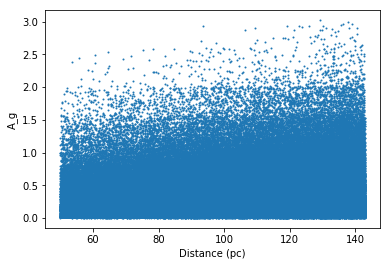

In [14]:
Ag = t["a_g_val"].values
plt.scatter(Dist,Ag,s=1)
plt.xlabel('Distance (pc)')
plt.ylabel('A_g')
plt.show()

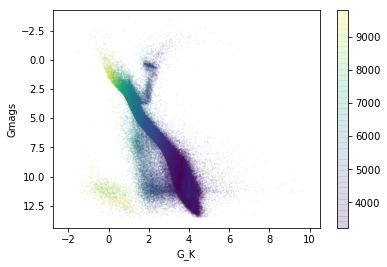

In [15]:
plt.scatter(G_K,Gmags,s=.1,alpha=.1,c=Temp)
plt.gca().invert_yaxis()
plt.xlabel('G_K')
plt.ylabel('Gmags')
plt.colorbar()
plt.show()

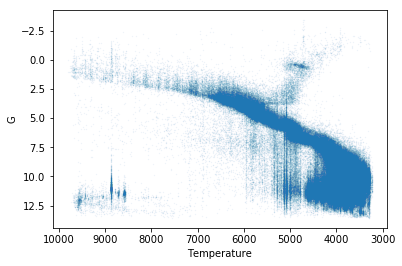

In [16]:
plt.scatter(Temp,Gmags,s=.1,alpha = 0.1)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature')
plt.ylabel('G')
plt.show()

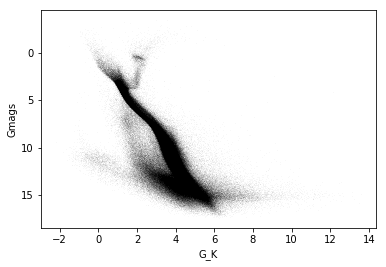

In [17]:
#Gabs vs G_k

plt.scatter(G_K,Gmags,s=.01,alpha=0.1,color="black")
plt.gca().invert_yaxis()
plt.xlabel('G_K')
plt.ylabel('Gmags')
plt.show()

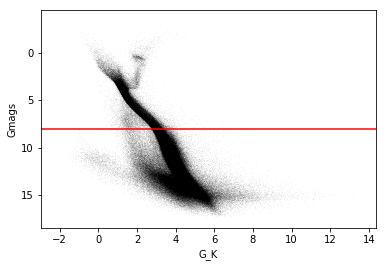

In [18]:
#Gabs vs G_k

plt.scatter(G_K,Gmags,s=.01,alpha=0.1,color="black")
plt.axhline(y = 8,c='r')
plt.gca().invert_yaxis()
plt.xlabel('G_K')
plt.ylabel('Gmags')
plt.show()

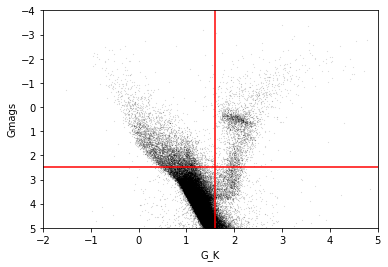

In [28]:
#Gabs vs G_k

plt.scatter(G_K,Gmags,s=.01,alpha=0.5,color="black")
plt.ylim(ymin=-4,ymax =5)
plt.xlim(xmin=-2,xmax=5)
plt.axvline(x = 1.6,c='r')
plt.axhline(y = 2.5,c ='r')
plt.gca().invert_yaxis()
plt.xlabel('G_K')
plt.ylabel('Gmags')
plt.show()

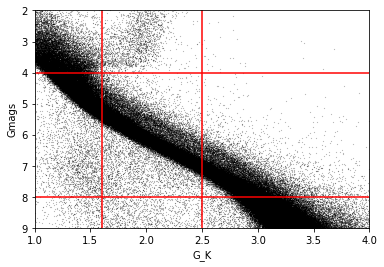

In [21]:
#Gabs vs G_k

plt.scatter(G_K,Gmags,s=.01,alpha=1,color="black")
plt.ylim(ymin=2,ymax =9)
plt.xlim(xmin=1,xmax=4)
plt.axhline(y = 4,c='r')
plt.axhline(y = 8,c ='r')
plt.axvline(x = 1.6,c='r')
plt.axvline(x = 2.5,c='r')
plt.gca().invert_yaxis()
plt.xlabel('G_K')
plt.ylabel('Gmags')
plt.show()

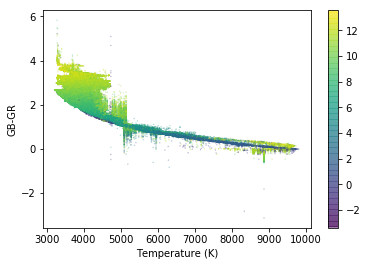

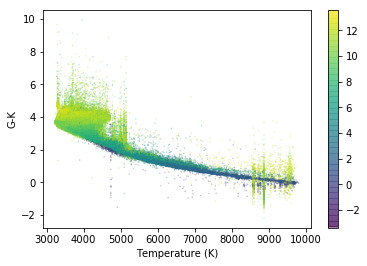

In [22]:
#Teff as a function of GB-GR
GB_GR = GBmags - GRmags
plt.scatter(Temp, GB_GR,s=0.1,alpha=0.5,c = Gmags)
plt.colorbar()
plt.xlabel('Temperature (K)')
plt.ylabel('GB-GR')
plt.show()

plt.scatter(Temp,G_K,s=0.1,alpha=0.5,c = Gmags)
plt.colorbar()
plt.xlabel('Temperature (K)')
plt.ylabel('G-K')
plt.show()

# Templates

In [55]:
colors = np.arange(-0.4,6,0.2)
color = ColorClassification(Gmags,Kmags,colors)
stars,color_mags,color_std,color_std_err,sdss_err = CreateTemplates4(color,colors,GBmags, GRmags,Gmags,Jmags,\
Hmags,Kmags,umags,gmags,rmags,imags,zmags,umag_err,gmag_err,rmag_err,imag_err,zmag_err,Gmags_err2,GBmags_err2,\
GRmags_err2)

In [69]:
stars

array([    594.,     344.,     583.,     902.,    1091.,    1398.,
          2185.,    4861.,   11463.,   18777.,   20214.,   17487.,
         17639.,   17118.,   16579.,   17699.,   20720.,   26797.,
         37577.,   56765.,   89079.,  108376.,   99897.,   75276.,
         52721.,   37108.,   26940.,   19963.,   15104.,   11125.,
          7935.,    5383.])

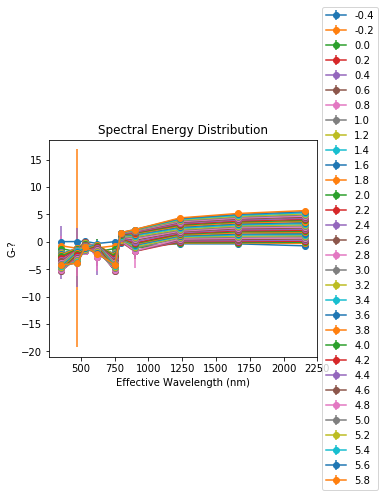

In [66]:
ax = plt.subplot(111)
for i in range(len(colors)):
    ax.errorbar(wvl, color_mags[i,:], yerr = abs(sdss_err[i,:]), linestyle = '-', marker = 'o',label = str(colors[i]))
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('G-?')
ax.set_title('Spectral Energy Distribution')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

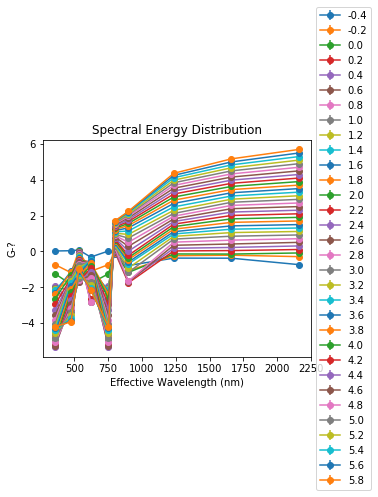

In [23]:
#Template of All the Stars

wvl = [357,475,532,620,752,797,899,1235,1662,2159]
wvl2 = [357,475,532,620,673,752,797,899,1235,1662,2159] 
colors = np.arange(-0.4,6,0.2)

color = ColorClassification(Gmags,Kmags,colors)
stars,color_mags,color_std,color_std_err,abs_color_mags,abs_color_std,abs_color_std_err = \
CreateTemplates3(color,colors,GBmags,GRmags,Gmags,Jmags,Hmags,Kmags,umags,gmags,rmags,imags,zmags)

ax = plt.subplot(111)
for i in range(len(colors)):
    ax.errorbar(wvl, color_mags[i,:], yerr = color_std_err[i,:], linestyle = '-', marker = 'o',label = str(colors[i]))
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('G-?')
ax.set_title('Spectral Energy Distribution')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

name = 'FinalTemplate1.csv'
FinalTemplate1 = PrintToFile(colors,stars,color_mags,color_std,color_std_err,name)

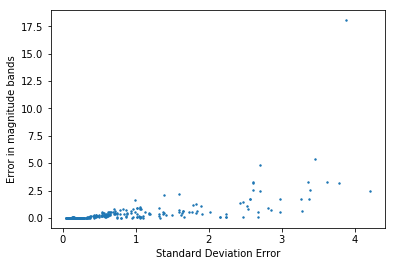

In [85]:
plt.scatter(abs(color_std),abs(sdss_err),s=2)
plt.ylabel('Error in magnitude bands')
plt.xlabel('Standard Deviation Error')
plt.show()

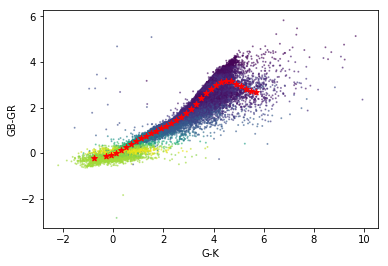

In [24]:
plot_G_K = color_mags[:,9]
plot_GB_GR = color_mags[:,5]-color_mags[:,2]
plt.scatter(G_K,GB_GR,s=1,alpha=0.5,c=Temp)
plt.scatter(plot_G_K,plot_GB_GR,c='r',marker = '*')
plt.xlabel('G-K')
plt.ylabel('GB-GR')
plt.show()

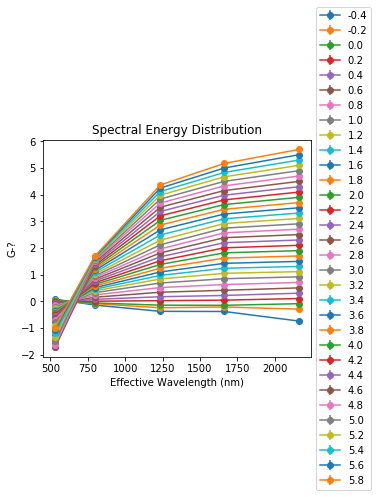

In [25]:
#remove columns 
color_mags = np.delete(color_mags,np.s_[0,1,3,4,6],1)

color_std_err = np.delete(color_std_err,np.s_[0,1,3,4,6],1)

wvl3 = [532,797,1235,1662,2159] 

ax = plt.subplot(111)
for i in range(len(colors)):
    ax.errorbar(wvl3, color_mags[i,:], yerr = color_std_err[i,:], linestyle = '-', marker = 'o',label = str(colors[i]))
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('G-?')
ax.set_title('Spectral Energy Distribution')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [29]:
#limit the magnitudes to <8
GBmags2 = np.ma.MaskedArray(GBmags, mask=(np.ones_like(GBmags)*(Gmags[:]>=8)))
GRmags2 = np.ma.MaskedArray(GRmags, mask=(np.ones_like(GRmags)*(Gmags[:]>=8)))
Gmags2 = np.ma.MaskedArray(Gmags, mask=(np.ones_like(Gmags)*(Gmags[:]>=8)))
Jmags2 = np.ma.MaskedArray(Jmags, mask=(np.ones_like(Jmags)*(Gmags[:]>=8)))
Hmags2 = np.ma.MaskedArray(Hmags, mask=(np.ones_like(Hmags)*(Gmags[:]>=8)))
Kmags2 = np.ma.MaskedArray(Kmags, mask=(np.ones_like(Kmags)*(Gmags[:]>=8)))
umags2 = np.ma.MaskedArray(umags, mask=(np.ones_like(umags)*(Gmags[:]>=8)))
gmags2 = np.ma.MaskedArray(gmags, mask=(np.ones_like(gmags)*(Gmags[:]>=8)))
rmags2 = np.ma.MaskedArray(rmags, mask=(np.ones_like(rmags)*(Gmags[:]>=8)))
imags2 = np.ma.MaskedArray(imags, mask=(np.ones_like(imags)*(Gmags[:]>=8)))
zmags2 = np.ma.MaskedArray(zmags, mask=(np.ones_like(zmags)*(Gmags[:]>=8)))

count = 0
for i in range(len(Gmags2)):
    if Hmags2.mask[i] == False:
        count = count+1
print(count)

count = 0
for i in range(len(Gmags2)):
    if gmags2.mask[i] == False:
        count = count+1
print(count)

GBmags2 = GBmags2.filled(np.nan)
GRmags2 = GRmags2.filled(np.nan)
Gmags2 = Gmags2.filled(np.nan)
Jmags2 = Jmags2.filled(np.nan)
Hmags2 = Hmags2.filled(np.nan)
Kmags2 = Kmags2.filled(np.nan)
umags2 = umags2.filled(np.nan)
gmags2 = gmags2.filled(np.nan)
rmags2 = rmags2.filled(np.nan)
imags2 = imags2.filled(np.nan)
zmags2 = zmags2.filled(np.nan)

171911
171911


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: Mean of empty slice
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: Mean of empty slice


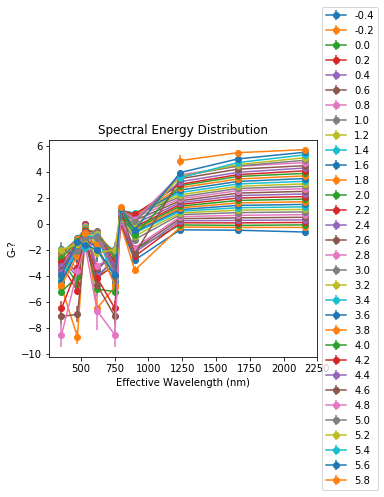

In [30]:
wvl = [357,475,532,620,752,797,899,1235,1662,2159]
wvl2 = [357,475,532,620,673,752,797,899,1235,1662,2159]
colors = np.arange(-0.4,6,0.2)

color = ColorClassification(Gmags2,Kmags2,colors)
stars,color_mags,color_std,color_std_err,abs_color_mags,abs_color_std,abs_color_std_err = \
CreateTemplates3(color,colors,GBmags2,GRmags2,Gmags2,Jmags2,Hmags2,Kmags2,umags2,gmags2,rmags2,imags2,zmags2)

ax = plt.subplot(111)
for i in range(len(colors)):
    ax.errorbar(wvl, color_mags[i,:], yerr = color_std_err[i,:], linestyle = '-', marker = 'o',label = str(colors[i]))
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('G-?')
ax.set_title('Spectral Energy Distribution')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

name = 'FinalTemplate2.csv'
FinalTemplate1 = PrintToFile(colors,stars,color_mags,color_std,color_std_err,name)

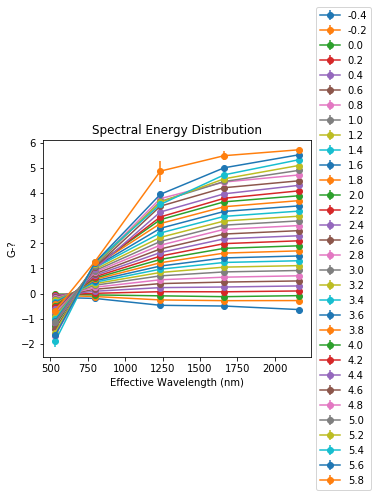

In [31]:
#remove columns 
color_mags = np.delete(color_mags,np.s_[0,1,3,4,6],1)

color_std_err = np.delete(color_std_err,np.s_[0,1,3,4,6],1)

wvl3 = [532,797,1235,1662,2159] 

ax = plt.subplot(111)
for i in range(len(colors)):
    ax.errorbar(wvl3, color_mags[i,:], yerr = color_std_err[i,:], linestyle = '-', marker = 'o',label = str(colors[i]))
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('G-?')
ax.set_title('Spectral Energy Distribution')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [32]:
#limit the magnitudes to <2.5 and G-K to greater than 1.6
G_K = Gmags-Kmags
GBmags2 = np.ma.MaskedArray(GBmags, mask=(np.ones_like(GBmags)*(Gmags[:]>=2.5)))
GRmags2 = np.ma.MaskedArray(GRmags, mask=(np.ones_like(GRmags)*(Gmags[:]>=2.5)))
Gmags2 = np.ma.MaskedArray(Gmags, mask=(np.ones_like(Gmags)*(Gmags[:]>=2.5)))
Jmags2 = np.ma.MaskedArray(Jmags, mask=(np.ones_like(Jmags)*(Gmags[:]>=2.5)))
Hmags2 = np.ma.MaskedArray(Hmags, mask=(np.ones_like(Hmags)*(Gmags[:]>=2.5)))
Kmags2 = np.ma.MaskedArray(Kmags, mask=(np.ones_like(Kmags)*(Gmags[:]>=2.5)))
umags2 = np.ma.MaskedArray(umags, mask=(np.ones_like(umags)*(Gmags[:]>=2.5)))
gmags2 = np.ma.MaskedArray(gmags, mask=(np.ones_like(gmags)*(Gmags[:]>=2.5)))
rmags2 = np.ma.MaskedArray(rmags, mask=(np.ones_like(rmags)*(Gmags[:]>=2.5)))
imags2 = np.ma.MaskedArray(imags, mask=(np.ones_like(imags)*(Gmags[:]>=2.5)))
zmags2 = np.ma.MaskedArray(zmags, mask=(np.ones_like(zmags)*(Gmags[:]>=2.5)))

GBmags2 = np.ma.MaskedArray(GBmags2, mask=(np.ones_like(GBmags)*(G_K[:]<=1.6)))
GRmags2 = np.ma.MaskedArray(GRmags2, mask=(np.ones_like(GRmags)*(G_K[:]<=1.6)))
Gmags2 = np.ma.MaskedArray(Gmags2, mask=(np.ones_like(Gmags)*(G_K[:]<=1.6)))
Jmags2 = np.ma.MaskedArray(Jmags2, mask=(np.ones_like(Jmags)*(G_K[:]<=1.6)))
Hmags2 = np.ma.MaskedArray(Hmags2, mask=(np.ones_like(Hmags)*(G_K[:]<=1.6)))
Kmags2 = np.ma.MaskedArray(Kmags2, mask=(np.ones_like(Kmags)*(G_K[:]<=1.6)))
umags2 = np.ma.MaskedArray(umags2, mask=(np.ones_like(umags)*(G_K[:]<=1.6)))
gmags2 = np.ma.MaskedArray(gmags2, mask=(np.ones_like(gmags)*(G_K[:]<=1.6)))
rmags2 = np.ma.MaskedArray(rmags2, mask=(np.ones_like(rmags)*(G_K[:]<=1.6)))
imags2 = np.ma.MaskedArray(imags2, mask=(np.ones_like(imags)*(G_K[:]<=1.6)))
zmags2 = np.ma.MaskedArray(zmags2, mask=(np.ones_like(zmags)*(G_K[:]<=1.6)))

count = 0
for i in range(len(Gmags2)):
    if Hmags2.mask[i] == False:
        count = count+1
print(count)

count = 0
for i in range(len(Gmags2)):
    if gmags2.mask[i] == False:
        count = count+1
print(count)

GBmags2 = GBmags2.filled(np.nan)
GRmags2 = GRmags2.filled(np.nan)
Gmags2 = Gmags2.filled(np.nan)
Jmags2 = Jmags2.filled(np.nan)
Hmags2 = Hmags2.filled(np.nan)
Kmags2 = Kmags2.filled(np.nan)
umags2 = umags2.filled(np.nan)
gmags2 = gmags2.filled(np.nan)
rmags2 = rmags2.filled(np.nan)
imags2 = imags2.filled(np.nan)
zmags2 = zmags2.filled(np.nan)

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less_equal
  from ipykernel import kernelapp as app
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less_equal
  app.launch_new_instance()
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less_equal
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less_equal
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less_equal
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.

2966
2966


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: Mean of empt

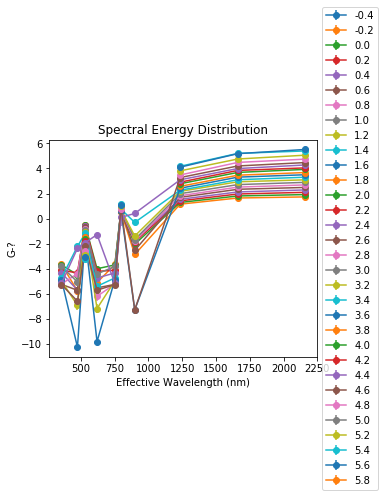

In [33]:
wvl = [357,475,532,620,752,797,899,1235,1662,2159]
wvl2 = [357,475,532,620,673,752,797,899,1235,1662,2159]
colors = np.arange(-0.4,6,0.2)

color = ColorClassification(Gmags2,Kmags2,colors)
stars,color_mags,color_std,color_std_err,abs_color_mags,abs_color_std,abs_color_std_err = \
CreateTemplates3(color,colors,GBmags2,GRmags2,Gmags2,Jmags2,Hmags2,Kmags2,umags2,gmags2,rmags2,imags2,zmags2)

ax = plt.subplot(111)
for i in range(len(colors)):
    ax.errorbar(wvl, color_mags[i,:], yerr = color_std_err[i,:], linestyle = '-', marker = 'o',label = str(colors[i]))
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('G-?')
ax.set_title('Spectral Energy Distribution')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

name = 'FinalTemplate3.csv'
FinalTemplate1 = PrintToFile(colors,stars,color_mags,color_std,color_std_err,name)

In [35]:
GBmags2 = np.ma.MaskedArray(GBmags, mask=(np.ones_like(GBmags)*(Gmags[:]<4)))
GRmags2 = np.ma.MaskedArray(GRmags, mask=(np.ones_like(GRmags)*(Gmags[:]<4)))
Gmags2 = np.ma.MaskedArray(Gmags, mask=(np.ones_like(Gmags)*(Gmags[:]<4)))
Jmags2 = np.ma.MaskedArray(Jmags, mask=(np.ones_like(Jmags)*(Gmags[:]<4)))
Hmags2 = np.ma.MaskedArray(Hmags, mask=(np.ones_like(Hmags)*(Gmags[:]<4)))
Kmags2 = np.ma.MaskedArray(Kmags, mask=(np.ones_like(Kmags)*(Gmags[:]<4)))
umags2 = np.ma.MaskedArray(umags, mask=(np.ones_like(umags)*(Gmags[:]<4)))
gmags2 = np.ma.MaskedArray(gmags, mask=(np.ones_like(gmags)*(Gmags[:]<4)))
rmags2 = np.ma.MaskedArray(rmags, mask=(np.ones_like(rmags)*(Gmags[:]<4)))
imags2 = np.ma.MaskedArray(imags, mask=(np.ones_like(imags)*(Gmags[:]<4)))
zmags2 = np.ma.MaskedArray(zmags, mask=(np.ones_like(zmags)*(Gmags[:]<4)))

GBmags2 = np.ma.MaskedArray(GBmags2, mask=(np.ones_like(GBmags)*(G_K[:]<=1.6)))
GRmags2 = np.ma.MaskedArray(GRmags2, mask=(np.ones_like(GRmags)*(G_K[:]<=1.6)))
Gmags2 = np.ma.MaskedArray(Gmags2, mask=(np.ones_like(Gmags)*(G_K[:]<=1.6)))
Jmags2 = np.ma.MaskedArray(Jmags2, mask=(np.ones_like(Jmags)*(G_K[:]<=1.6)))
Hmags2 = np.ma.MaskedArray(Hmags2, mask=(np.ones_like(Hmags)*(G_K[:]<=1.6)))
Kmags2 = np.ma.MaskedArray(Kmags2, mask=(np.ones_like(Kmags)*(G_K[:]<=1.6)))
umags2 = np.ma.MaskedArray(umags2, mask=(np.ones_like(umags)*(G_K[:]<=1.6)))
gmags2 = np.ma.MaskedArray(gmags2, mask=(np.ones_like(gmags)*(G_K[:]<=1.6)))
rmags2 = np.ma.MaskedArray(rmags2, mask=(np.ones_like(rmags)*(G_K[:]<=1.6)))
imags2 = np.ma.MaskedArray(imags2, mask=(np.ones_like(imags)*(G_K[:]<=1.6)))
zmags2 = np.ma.MaskedArray(zmags2, mask=(np.ones_like(zmags)*(G_K[:]<=1.6)))

GBmags2 = np.ma.MaskedArray(GBmags2, mask=(np.ones_like(GBmags)*(Gmags[:]>=8)))
GRmags2 = np.ma.MaskedArray(GRmags2, mask=(np.ones_like(GRmags)*(Gmags[:]>=8)))
Gmags2 = np.ma.MaskedArray(Gmags2, mask=(np.ones_like(Gmags)*(Gmags[:]>=8)))
Jmags2 = np.ma.MaskedArray(Jmags2, mask=(np.ones_like(Jmags)*(Gmags[:]>=8)))
Hmags2 = np.ma.MaskedArray(Hmags2, mask=(np.ones_like(Hmags)*(Gmags[:]>=8)))
Kmags2 = np.ma.MaskedArray(Kmags2, mask=(np.ones_like(Kmags)*(Gmags[:]>=8)))
umags2 = np.ma.MaskedArray(umags2, mask=(np.ones_like(umags)*(Gmags[:]>=8)))
gmags2 = np.ma.MaskedArray(gmags2, mask=(np.ones_like(gmags)*(Gmags[:]>=8)))
rmags2 = np.ma.MaskedArray(rmags2, mask=(np.ones_like(rmags)*(Gmags[:]>=8)))
imags2 = np.ma.MaskedArray(imags2, mask=(np.ones_like(imags)*(Gmags[:]>=8)))
zmags2 = np.ma.MaskedArray(zmags2, mask=(np.ones_like(zmags)*(Gmags[:]>=8)))

GBmags2 = np.ma.MaskedArray(GBmags2, mask=(np.ones_like(GBmags)*(G_K[:]>=2.5)))
GRmags2 = np.ma.MaskedArray(GRmags2, mask=(np.ones_like(GRmags)*(G_K[:]>=2.5)))
Gmags2 = np.ma.MaskedArray(Gmags2, mask=(np.ones_like(Gmags)*(G_K[:]>=2.5)))
Jmags2 = np.ma.MaskedArray(Jmags2, mask=(np.ones_like(Jmags)*(G_K[:]>=2.5)))
Hmags2 = np.ma.MaskedArray(Hmags2, mask=(np.ones_like(Hmags)*(G_K[:]>=2.5)))
Kmags2 = np.ma.MaskedArray(Kmags2, mask=(np.ones_like(Kmags)*(G_K[:]>=2.5)))
umags2 = np.ma.MaskedArray(umags2, mask=(np.ones_like(umags)*(G_K[:]>=2.5)))
gmags2 = np.ma.MaskedArray(gmags2, mask=(np.ones_like(gmags)*(G_K[:]>=2.5)))
rmags2 = np.ma.MaskedArray(rmags2, mask=(np.ones_like(rmags)*(G_K[:]>=2.5)))
imags2 = np.ma.MaskedArray(imags2, mask=(np.ones_like(imags)*(G_K[:]>=2.5)))
zmags2 = np.ma.MaskedArray(zmags2, mask=(np.ones_like(zmags)*(G_K[:]>=2.5)))

count = 0
for i in range(len(Gmags2)):
    if Hmags2.mask[i] == False:
        count = count+1
print(count)

count = 0
for i in range(len(Gmags2)):
    if gmags2.mask[i] == False:
        count = count+1
print(count)

GBmags2 = GBmags2[~GBmags2.mask]
GRmags2 = GRmags2[~GRmags2.mask]
Gmags2 = Gmags2[~Gmags2.mask]
Jmags2 = Jmags2[~Jmags2.mask]
Hmags2 = Hmags2[~Hmags2.mask]
Kmags2 = Kmags2[~Kmags2.mask]
umags2 = umags2[~umags2.mask]
gmags2 = gmags2[~gmags2.mask]
rmags2 = rmags2[~rmags2.mask]
imags2 = imags2[~imags2.mask]
zmags2 = zmags2[~zmags2.mask]

num  = 2966

GBmags3 = np.ones(num)
GRmags3 = np.ones(num)
Gmags3 = np.ones(num)
Jmags3 = np.ones(num)
Hmags3 = np.ones(num)
Kmags3 = np.ones(num)
umags3 = np.ones(num)
gmags3 = np.ones(num)
rmags3 = np.ones(num)
imags3 = np.ones(num)
zmags3 = np.ones(num)

import random
indices = random.sample(range(len(GBmags2)), num)
for i in range(len(indices)):
    index = indices[i]
    GBmags3[i] = GBmags2[index]
    GRmags3[i] = GRmags2[index]
    Gmags3[i] = Gmags2[index]
    Jmags3[i] = Jmags2[index]
    Hmags3[i] = Hmags2[index]
    Kmags3[i] = Kmags2[index]
    umags3[i] = umags2[index]
    gmags3[i] = gmags2[index]
    rmags3[i] = rmags2[index]
    imags3[i] = imags2[index]
    zmags3[i] = zmags2[index]

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less_equal
  del sys.path[0]
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less_equal
  
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less_equal
  from ipykernel import kernelapp as app
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less_equal
  app.launch_new_instance()
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less_equal
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less_equal
/astromake/opt/python/anaconda3/lib/python3.6/site-package

66998
66998


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: Mean of empt

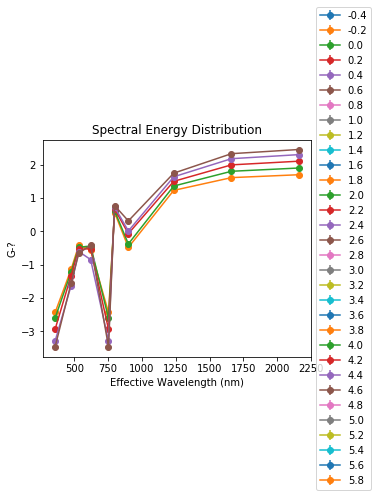

In [36]:
wvl = [357,475,532,620,752,797,899,1235,1662,2159]
wvl2 = [357,475,532,620,673,752,797,899,1235,1662,2159]
colors = np.arange(-0.4,6,0.2)

color = ColorClassification(Gmags3,Kmags3,colors)
stars2,color_mags2,color_std2,color_std_err2,abs_color_mags2,abs_color_std2,abs_color_std_err2 = \
CreateTemplates3(color,colors,GBmags3,GRmags3,Gmags3,Jmags3,Hmags3,Kmags3,umags3,gmags3,rmags3,imags3,zmags3)

ax = plt.subplot(111)
for i in range(len(colors)):
    ax.errorbar(wvl, color_mags2[i,:], yerr = color_std_err2[i,:], linestyle = '-', marker = 'o',label = str(colors[i]))
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('G-?')
ax.set_title('Spectral Energy Distribution')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

name = 'FinalTemplate4.csv'
FinalTemplate1 = PrintToFile(colors,stars,color_mags,color_std,color_std_err,name)

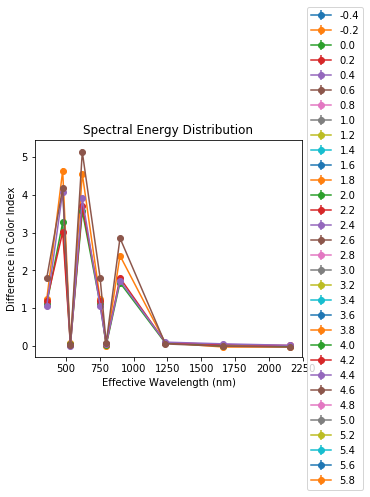

In [37]:
#Subtract the two templates
diff_mags = color_mags2-color_mags
ax = plt.subplot(111)
for i in range(len(colors)):
    ax.errorbar(wvl, diff_mags[i,:], yerr = color_std_err2[i,:], linestyle = '-', marker = 'o',label = str(colors[i]))
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('Difference in Color Index')
ax.set_title('Spectral Energy Distribution')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

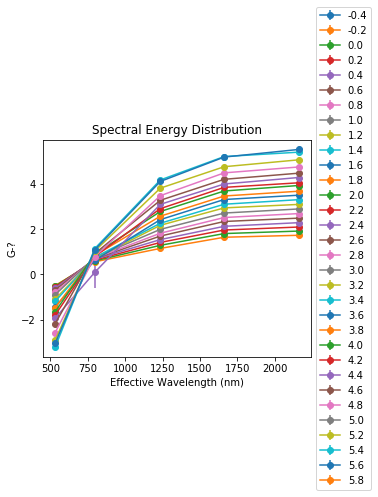

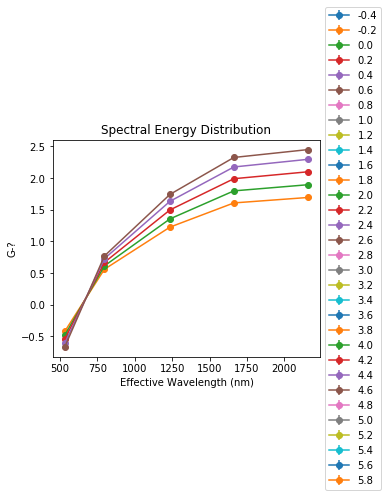

In [38]:
#remove columns 
color_mags = np.delete(color_mags,np.s_[0,1,3,4,6],1)

color_std_err = np.delete(color_std_err,np.s_[0,1,3,4,6],1)

wvl3 = [532,797,1235,1662,2159] 

ax = plt.subplot(111)
for i in range(len(colors)):
    ax.errorbar(wvl3, color_mags[i,:], yerr = color_std_err[i,:], linestyle = '-', marker = 'o',label = str(colors[i]))
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('G-?')
ax.set_title('Spectral Energy Distribution')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


#remove columns 
color_mags2 = np.delete(color_mags2,np.s_[0,1,3,4,6],1)

color_std_err2 = np.delete(color_std_err2,np.s_[0,1,3,4,6],1)

wvl3 = [532,797,1235,1662,2159] 

ax = plt.subplot(111)
for i in range(len(colors)):
    ax.errorbar(wvl3, color_mags2[i,:], yerr = color_std_err2[i,:], linestyle = '-', marker = 'o',label = str(colors[i]))
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('G-?')
ax.set_title('Spectral Energy Distribution')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Read in Template Files

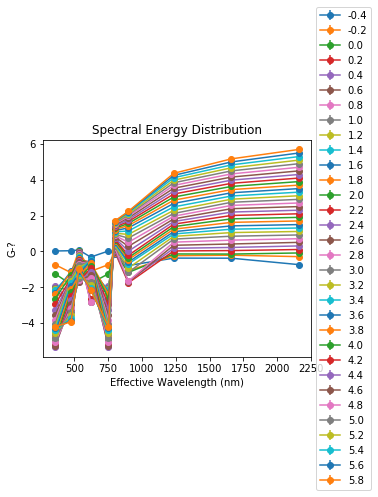

In [37]:
wvl = [357,475,532,620,752,797,899,1235,1662,2159]

FinalTemplate1 = genfromtxt('FinalTemplate1.csv', delimiter=',')
colors = FinalTemplate1[:,0]
color_mags = FinalTemplate1[:,2:12]
color_std = FinalTemplate1[:,12:22]
color_std_err = FinalTemplate1[:,22:32]


ax = plt.subplot(111)
for i in range(len(colors)):
    ax.errorbar(wvl, color_mags[i,:], yerr = color_std_err[i,:], linestyle = '-', marker = 'o',label = str(colors[i]))
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('G-?')
ax.set_title('Spectral Energy Distribution')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
